# Laboratorio #5
### Nombre: Edgar Ronaldo Henao Villarreal

Antes de comenzar usamos algunas instrucciones importantes para realizar el laboratorio

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline
import numpy as np
def decimal_a_binario(n, k):
    '''
    Esta función recibe una longitud n y un entero k. Retorna una lista de longitud n tal que cada elemento
    es un dígito de la representación binaria de k.
    '''
    
    lista_binaria = []
    
    for i in reversed(range(n)):
        bit = k // 2**i
        k = k % 2**i
        lista_binaria.append(bit)
    
    return lista_binaria
def evaluar_oraculo_en_c(oraculo, c):
    
    
    tam = oraculo.num_qubits   # Tamaño o número de qubits que abarca el oráculo. No cambiar.
    
    ## Declaren el circuito cuántico con los parámetros adecuados:
    circuito = QuantumCircuit(len(c)+1, 1)      
    
    ## Inicialización
    ## Usen este ciclo for y un condicional if dentro del for para inicializar con el valor de c 
    ## los alambres superiores según los bits contenidos en la lista c. 
    for i in range(len(c)):
        circuito.x(i) if c[i] == 1 else None
            
    # Insertar circuito. No cambiar el segundo parámetro.
    circuito.append(oraculo, list(range(tam)))
    
    ## Medición
    ## Añadan la medición con los parámetros adecuados:
    circuito.measure(len(c), 0)
    
    ## Realización de la simulación con 1 shot 
    simulador = Aer.get_backend('qasm_simulator')
    conteos = execute(circuito, backend=simulador, shots=1).result().get_counts()
    valor_orac_en_c = int(list(conteos.keys())[0]) # No cambiar. Extrae del diccionario el estado medido
    
    ## Retornar lo solicitado en las indicaciones
    return valor_orac_en_c
def tabular_oraculo(oraculo):
    '''
    Esta función recibe como argumento una compuerta cuántica (oráculo) e imprime la tabulación de los valores
    de f para toda cadena en su dominio.
    '''
    n = oraculo.num_qubits - 1   # Determina la longitud de las cadenas de 0s y 1s en el conjunto de salida de f.
    
    ## Crear un print que escriba el título de la tabulación según lo pedido en las indicaciones
    
    print("Tabla de valores de la función f:{0, 1}^"+str(n)+" ---> {0, 1}")
    
    # Este ciclo for debe recorrer los enteros de 0 a 2^n - 1. Notemos que al pasar esos números 
    # a binario obtendremos todas las posibles cadenas de 0s y 1s de longitud n. 
    # (Desde 00...0 hasta 11...1)
     
    # Completar 
    for i in range(2**n):
        
        ## Completar con los parámetros adecuados para obtener una lista que contenga la 
        ## representación binaria del contador del ciclo.
        s = decimal_a_binario(n, i)
        
        ## La variable 'valor' debe corresponder al valor de f(s) y debe hallarse usando la 
        ## función del ejercicio anterior
        valor = evaluar_oraculo_en_c(oraculo, s)
        
        lista_a_cadena = ''.join([str(bit) for bit in s]) # Simplemente convierte la lista s a cadena para su
                                                          # uso en el print. No cambiar.
        
        ## Completar el print para que escriba la línea solicitada en las indicaciones.
        print("f({}) = {}".format(lista_a_cadena, valor))
       
    return

En este laboratorio vamos a analizar 3 funciones, estas se muestran a continuación:

## 1. Funcion
$$f(000) = 1, f(001) = 1, f(010) = 1, f(011) = 1, f(100) = 0, f(101) = 0, f(110) = 0 , f(111) = 0.$$ 

La funcion es representada en la imagen
<img src = "funcion1.jpg" style = "float:center" width = "40%">

En palabras textuales:
#### Las cadenas que comienzan en 1 van a 1 y las que comienzan en 0 van a 0. 
El circuito que representa la funcion anteriormente expuesta es:

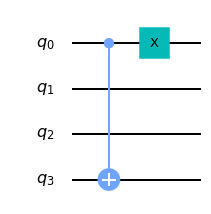

In [3]:
qc1 = QuantumCircuit(4)
qc1.cx(0,3)
qc1.x(0)
qc1.draw('mpl')

La idea del circuito anterior es basicamente realizar un CNOT controlado al primer qubit, cuando este es 0, nuestro resultado debe ser 0. Nuestra compuerta x es mas opcion personal y no incurre en el resultado final del oraculo.

In [5]:
oraculo1 = qc1.to_gate()
oraculo1.name = "orac1"

In [6]:
tabular_oraculo(oraculo1)

Tabla de valores de la función f:{0, 1}^3 ---> {0, 1}
f(000) = 0
f(001) = 0
f(010) = 0
f(011) = 0
f(100) = 1
f(101) = 1
f(110) = 1
f(111) = 1


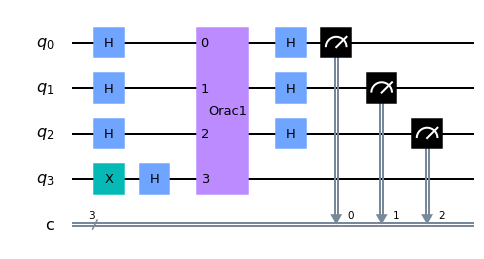

In [24]:
qcprueba = QuantumCircuit(4,3)
qcprueba.x(3)
qcprueba.h([0,1,2,3])
qcprueba.append(oraculo1,[0,1,2,3])
qcprueba.h([0,1,2])
qcprueba.measure([0,1,2],[0,1,2])
qcprueba.draw('mpl')

In [30]:
from qiskit import IBMQ
IBMQ.load_account()
proveedor = IBMQ.get_provider('ibm-q')
# Ejecucion en un computador cuantico real
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_athens')
ejecucion = execute(qcprueba,backend = comp_cuantico,shots = 1000)
from qiskit.tools.monitor import job_monitor
job_monitor(ejecucion)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

ibmqfactory.load_account:WARNING:2020-10-30 14:37:23,777: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
{'000': 58, '001': 890, '010': 12, '011': 10, '100': 6, '101': 23, '111': 1}


### Observaciones
Como observamos del experimento anterior, el estado $|000\rangle$ solo se obtiene un $5.8\%$ de los shots simulados, lo cual es de esperarse debido al oraculo que hemos construido, y las adiciones que le hicimos a nuestra funcion

## 2. Funcion

Las cadenas que van a 0 son: 001, 011, 100 y 101. Las demás van al 1.
La funcion es representada en la imagen
<img src = "funcion2.jpg" style = "float:center" width = "40%">

La descripcion de la funcion es:
#### Cadenas que finalizan en 00 o en 10, se hace intercambio 111 por 100.
El circuito que representa la funcion anteriormente expuesta es:

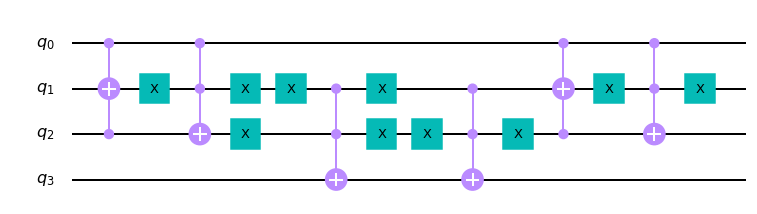

In [15]:
qc2 = QuantumCircuit(4)
qc2.ccx(0,2,1)
qc2.x(1)
qc2.ccx(0,1,2)
qc2.x(1)
qc2.x(2)
qc2.x(1)
qc2.ccx(1,2,3)
qc2.x(1)
qc2.x(2)
qc2.x(2)
qc2.ccx(1,2,3)
qc2.x(2)
qc2.ccx(0,2,1)
qc2.x(1)
qc2.ccx(0,1,2)
qc2.x(1)
qc2.draw('mpl')

La idea del circuito anterior es basicamente realizar el intercambio de la cadena 111 por 100, para lo cual se uso un toffoli con controles en los qubits 0 y 2 y la accion en el qubit 1. 

Luego procedemos a ingresar otro toffoli con control en el qubit 0 y 1 teniendo sensibilidad a 0 en el qubit 1 y accion en el qubit 2.

Procedemos ahora si a la realizacion del circuito que seria basicamente emular las cadenas finalizadas en $00$ para esto usamos un toffoli en qubits controlados 1 y 2, no sin antes añadirle sensibilidad a estos qubits en 0. Finalmente aplicamos nuevamente toffoli a los mismos qubits pero añadiendolo sensibilidad a 0 al qubit 2.

In [22]:
oraculo2 = qc2.to_gate()
oraculo2.name = "orac2"

In [18]:
tabular_oraculo(oraculo2)

Tabla de valores de la función f:{0, 1}^3 ---> {0, 1}
f(000) = 1
f(001) = 0
f(010) = 1
f(011) = 0
f(100) = 0
f(101) = 0
f(110) = 1
f(111) = 1


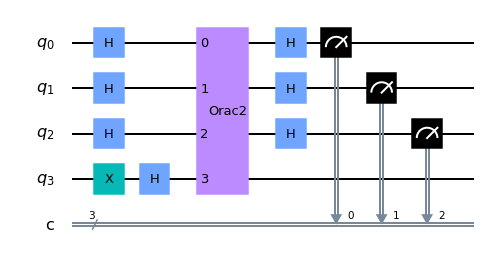

In [23]:
qcprueba1 = QuantumCircuit(4,3)
qcprueba1.x(3)
qcprueba1.h([0,1,2,3])
qcprueba1.append(oraculo2,[0,1,2,3])
qcprueba1.h([0,1,2])
qcprueba1.measure([0,1,2],[0,1,2])
qcprueba1.draw('mpl')

In [31]:
from qiskit import IBMQ
IBMQ.load_account()
proveedor = IBMQ.get_provider('ibm-q')
# Ejecucion en un computador cuantico real
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_athens')
ejecucion = execute(qcprueba1,backend = comp_cuantico,shots = 1000)
from qiskit.tools.monitor import job_monitor
job_monitor(ejecucion)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

ibmqfactory.load_account:WARNING:2020-10-30 14:48:37,915: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
{'000': 93, '001': 49, '010': 53, '011': 56, '100': 194, '101': 225, '110': 152, '111': 178}


### Observaciones

Como observamos del experimento anterior, el estado $|000\rangle$ se repite un $9.3\%$ de las veces lo cual quiere mostrar que es un porcentaje bastante pequeño y uno de los estados mas improbables como observamos en el anterior experimento--

## 3. Funcion

Las cadenas que van al 1 son: 001, 010, 101, 111. Las demás van al 0. La representacion es:
<img src = "funcion3.jpg" style = "float:center" width = "40%">

La descripcion de la funcion es:
#### Las cadenas que finalizan en 01 o en 10 intercambiando 111 por 110
El circuito que representa la funcion anteriormente expuesta es:

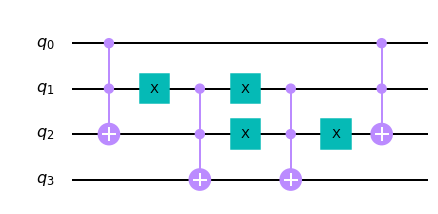

In [26]:
qc3 = QuantumCircuit(4)
qc3.ccx(0,1,2)
qc3.x(1)
qc3.ccx(1,2,3)
qc3.x(1)
qc3.x(2)
qc3.ccx(1,2,3)
qc3.x(2)
qc3.ccx(0,1,2)
qc3.draw('mpl')

Aplicamos un toffoli controlando qubits 0 y 1 con accion en 2 para intercambiar la cadena $111$ por la cadena $110$

Luego aplicamos otro toffoli con control en qubits 1 y 2 y colocando sensibilidad a 0 en el qubit 1. Repetimos pero la sensibilidad ahora se aplica al qubit 2. Asi emulamos la descripcion propuesta

In [27]:
oraculo3 = qc3.to_gate()
oraculo3.name = "orac3"

In [28]:
tabular_oraculo(oraculo3)

Tabla de valores de la función f:{0, 1}^3 ---> {0, 1}
f(000) = 0
f(001) = 1
f(010) = 1
f(011) = 0
f(100) = 0
f(101) = 1
f(110) = 0
f(111) = 1


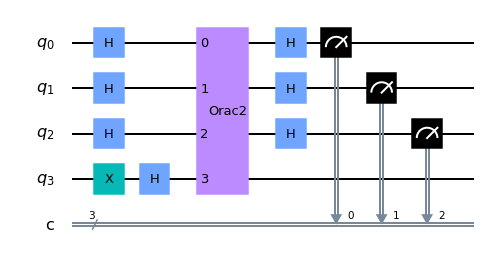

In [29]:
qcprueba2 = QuantumCircuit(4,3)
qcprueba2.x(3)
qcprueba2.h([0,1,2,3])
qcprueba2.append(oraculo2,[0,1,2,3])
qcprueba2.h([0,1,2])
qcprueba2.measure([0,1,2],[0,1,2])
qcprueba2.draw('mpl')

In [32]:
from qiskit import IBMQ
IBMQ.load_account()
proveedor = IBMQ.get_provider('ibm-q')
# Ejecucion en un computador cuantico real
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_athens')
ejecucion = execute(qcprueba1,backend = comp_cuantico,shots = 1000)
from qiskit.tools.monitor import job_monitor
job_monitor(ejecucion)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

ibmqfactory.load_account:WARNING:2020-10-30 15:02:18,571: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
{'000': 114, '001': 105, '010': 91, '011': 86, '100': 140, '101': 162, '110': 145, '111': 157}


### Observaciones
Como observamos del experimento anterior, el estado $|000\rangle$ nuevamente se repite pocas veces. 


## Observaciones finales
Todos los experimentos fueron realizados en el computador cuantico de Atenas, por lo que los resultados pueden variar.
Como observamos de los experimentos, los tres primeros estados son los menos repetidos, exceptuando esta observacion en el primer experimento.

En cuanto al estado $|000\rangle$ observamos que el porcentaje de variacion no es muy alto, en lo personal creo que esto se debe a la estructura presentada en el algoritmo.
